In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train /= 255
x_test /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2111 - accuracy: 0.9364
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0854 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0580 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0446 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0343 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0237 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0224 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 35s 19m

In [9]:
y_predict = model.predict(x_test)

In [10]:
y_predict[0]

array([2.10038549e-11, 1.45292480e-12, 1.32848821e-09, 1.37502065e-10,
       4.65796428e-14, 1.40846875e-14, 6.46418578e-20, 1.00000000e+00,
       2.76427683e-11, 3.27554583e-09], dtype=float32)

In [11]:
from keras.utils.np_utils import to_categorical
import numpy as np
y_predicts=np.argmax(y_predict, axis=1) 

In [12]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

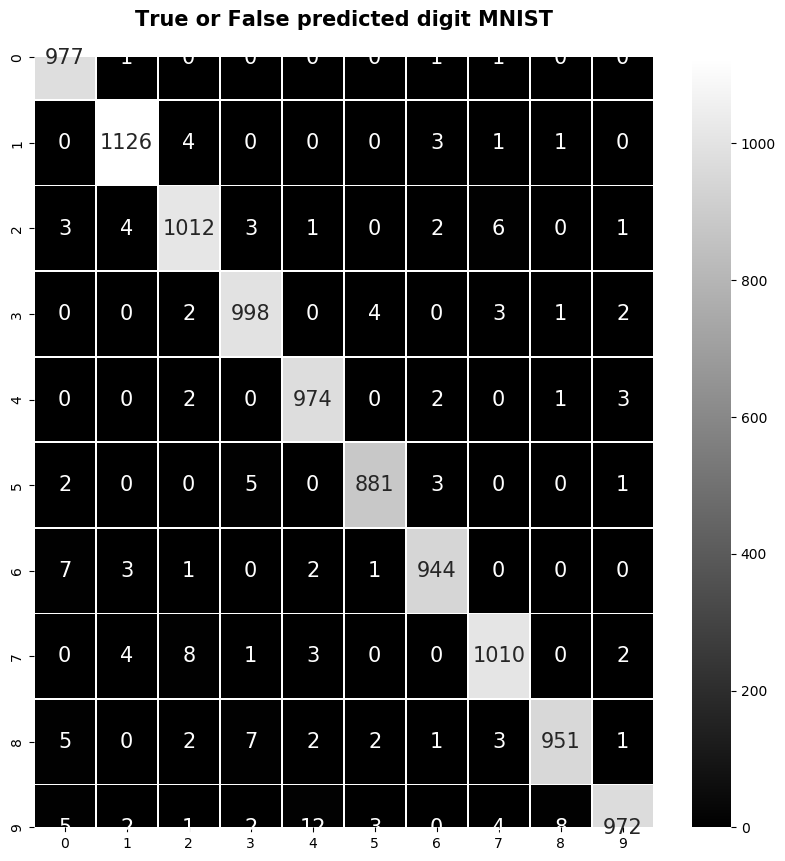

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
con_mat=confusion_matrix(y_test,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



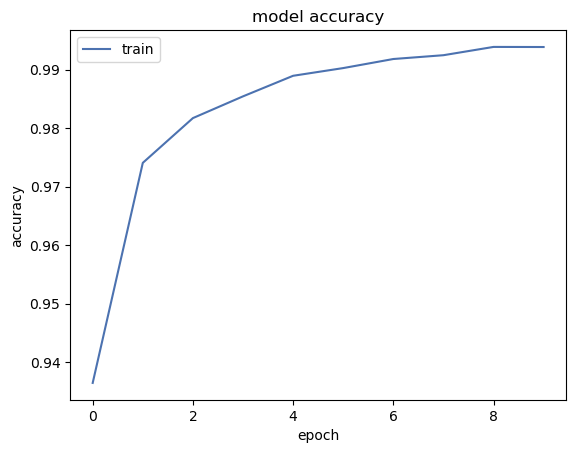

In [17]:

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0655 - accuracy: 0.9845


[0.06552891433238983, 0.984499990940094]

6


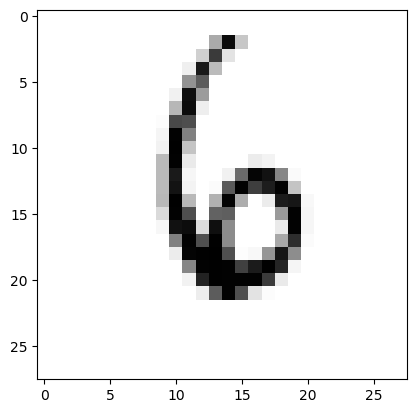

In [19]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())